In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlalchemy

from database_credentials import get_database_url
from datetime import datetime, timedelta

In [2]:
plt.style.use('ggplot')
sns.set_style('white')

In [3]:
database_url = get_database_url()
engine = sqlalchemy.create_engine(database_url)
connection = engine.connect()

In [4]:
buy_data = pd.read_sql_table('buy_data', connection)
sell_data = pd.read_sql_table('sell_data', connection)

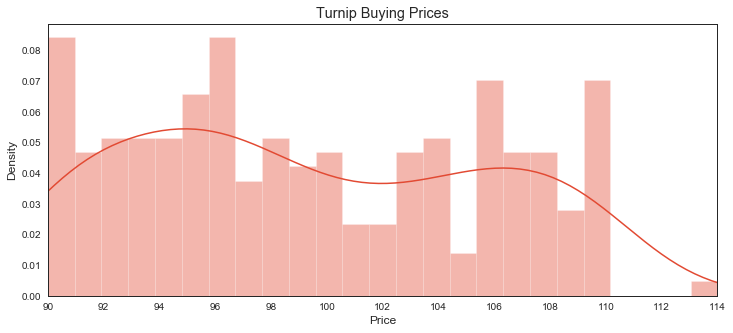

Buying Prices Description:
count    222.000000
mean      99.387387
std        6.433328
min       90.000000
25%       94.000000
50%       98.000000
75%      106.000000
max      114.000000
Name: price, dtype: float64



In [5]:
buy_prices = buy_data['price']
buy_price_describe = buy_prices.describe()

min_buy_price = buy_price_describe['min']
max_buy_price = buy_price_describe['max']

num_buy_bins = int(max_buy_price - min_buy_price + 1)
buy_dist_xticks = np.arange(min_buy_price, max_buy_price + 1, 2)

plt.figure(figsize=(12, 5))
buy_price_distribution = sns.distplot(buy_prices, bins=num_buy_bins)
buy_price_distribution.set(
    title='Turnip Buying Prices',
    xlabel='Price',
    ylabel='Density'
)
plt.xlim(min_buy_price, max_buy_price)
plt.xticks(buy_dist_xticks)
plt.show()

print("Buying Prices Description:\n{0}\n".format(buy_price_describe))

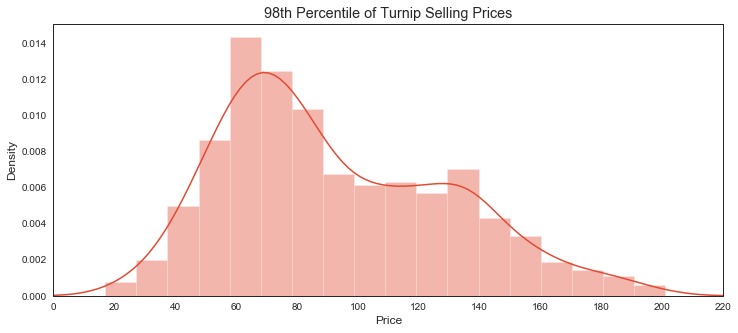

Selling Prices:
count    1749.000000
mean       98.177816
std        56.695792
min        17.000000
25%        65.000000
50%        85.000000
75%       124.000000
90%       150.000000
98%       201.040000
max       589.000000
Name: price, dtype: float64



In [7]:
sell_prices = sell_data['price']
sell_percentiles = [0.25, 0.50, 0.75, 0.90, 0.98]
sell_price_describe = sell_prices.describe(percentiles=sell_percentiles)

min_sell_price = sell_price_describe['min']
sell_price_98_percentile = sell_price_describe['98%']

# mask outlying price data above 98th percentile 
outlier_mask = sell_prices <= sell_price_98_percentile

num_sell_bins = int(round((sell_price_98_percentile - min_sell_price) / 10, 0))

sell_dist_tick_step = round(num_sell_bins, -1)
sell_dist_tick_max = (math.ceil(sell_price_98_percentile))
sell_dist_tick_max = sell_dist_tick_max + sell_dist_tick_step
sell_dist_xticks = np.arange(0, sell_dist_tick_max, sell_dist_tick_step)
                      
plt.figure(figsize=(12, 5))                 
sell_price_distribution = sns.distplot(
    sell_prices[outlier_mask], 
    bins=num_sell_bins
)
sell_price_distribution.set(
    title='98th Percentile of Turnip Selling Prices',
    xlabel='Price',
    ylabel='Density'
)
plt.xlim(0, round(sell_price_98_percentile, -1))
plt.xticks(sell_dist_xticks)
plt.show()

print("Selling Prices:\n{0}\n".format(sell_price_describe))

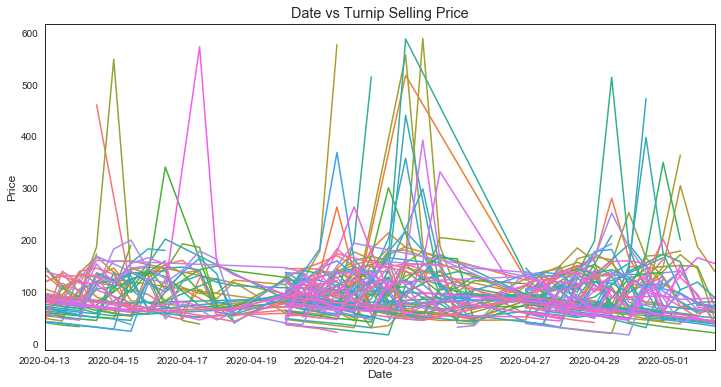

,datetime_observed,2020-04-13 00:00:00,2020-04-13 12:00:00,2020-04-14 00:00:00,2020-04-14 12:00:00,2020-04-15 00:00:00,2020-04-15 12:00:00,2020-04-16 00:00:00,2020-04-16 12:00:00,2020-04-17 00:00:00,2020-04-17 12:00:00,...,2020-04-28 00:00:00,2020-04-28 12:00:00,2020-04-29 00:00:00,2020-04-29 12:00:00,2020-04-30 00:00:00,2020-04-30 12:00:00,2020-05-01 00:00:00,2020-05-01 12:00:00,2020-05-02 00:00:00,2020-05-02 12:00:00
user_id,island_id,,,,,,,,,,,,,,,,,,,,,
Aaron,Moonstone,68.0,81.0,77.0,132.0,107.0,143.0,148.0,145.0,55.0,51.0,...,50.0,45.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adam,Key Largo,69.0,61.0,89.0,104.0,NaN,NaN,NaN,54.0,47.0,127.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aika,Erijima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,109.0,127.0,139.0,67.0,61.0,112.0,130.0,72.0,67.0,61.0


In [8]:
user_island_id =zip(sell_data['user_id'], sell_data['island_id'])
sell_data['user_island_id'] = list(user_island_id)
earliest_sell_date = sell_data['datetime_observed'].min()
latest_sell_date = sell_data['datetime_observed'].max()

plt.figure(figsize=(12, 6))
sell_price_plot = sns.lineplot(
    x='datetime_observed', 
    y='price', 
    data=sell_data, 
    hue='user_island_id', 
    legend=False
)
sell_price_plot.set(
    title='Date vs Turnip Selling Price',
    xlabel='Date',
    ylabel='Price'
)
plt.xlim(earliest_sell_date, latest_sell_date)
plt.show()

# tabular representation of time series
sell_data_pivot = pd.pivot_table(
    sell_data, 
    values='price', 
    index=['user_id', 'island_id'], 
    columns=['datetime_observed']
)
display(sell_data_pivot.head(3))

In [ ]:
connection.close()
engine.dispose()